<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/kalman/wavelet_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance
!pip install pywt

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pywt
import yfinance as yf

In [83]:
data=yf.download('^nsei',start='2018-02-01')[['Adj Close']]
data.reset_index(inplace=True)

[*********************100%***********************]  1 of 1 completed


In [84]:
data.head(2)

,Date,Adj Close
0,2018-02-01,11016.900391
1,2018-02-02,10760.599609


In [85]:
t=data['Date']
s=data['Adj Close']

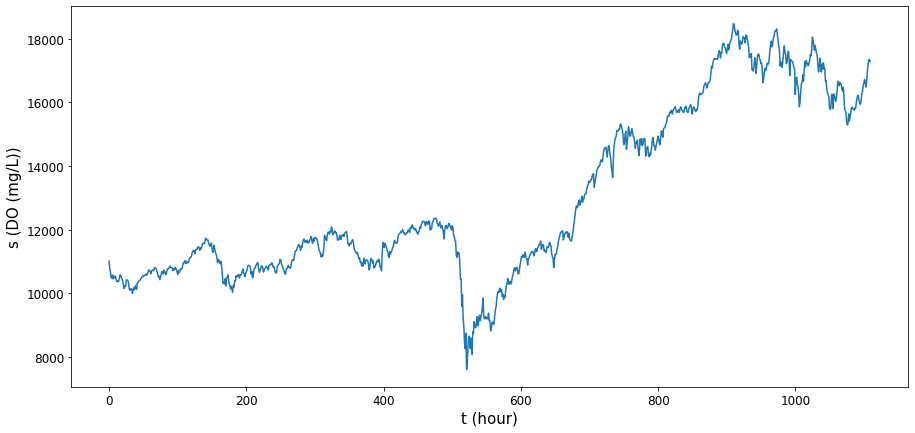

In [86]:
fig,ax = plt.subplots(figsize=(15,7))
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
ax.plot(s)
ax.set_xlabel('t (hour)',fontsize=15)
ax.set_ylabel('s (DO (mg/L))',fontsize=15)

plt.show()


In [87]:
coeffs = pywt.wavedec(s,'db6','sym',level=6)
(cA6,cD6,cD5,cD4,cD3,cD2,cD1) = coeffs


In [88]:
print('cA6 = ',cA6)
print('cD6 = ',cD6)

cA6 =  [ 84795.02567187  84890.12307431  84859.4978126   84936.00624172
  84761.96496499  84945.27907431  84820.40111907  84954.19195151
  85024.02179511  82471.53530293  88857.76964986  86752.04091101
  85215.80231184  93613.54105164  88773.6539043   96215.48179775
  90988.91583108  76689.27544654  86193.13590818  99767.15248122
 115974.75616035 119129.2019213  134752.66390207 140541.5759359
 138982.75341619 130360.89900604 136498.36855064 134986.32590316]
cD6 =  [   57.37005262   -62.87358933    85.4751525    123.10446819
   494.70724999  1442.54838484  1308.62855273 -1374.7188066
  -944.48005959  -464.21891001 -1489.11803367  -345.53923037
 -3951.71238905  6199.61849517 -4830.65405539  3484.40396076
 -2566.65900426  3383.29542103  1584.10014506  -574.29305373
  1939.93826649 -2362.35809319 -3336.69173282  2566.76874638
  4126.5492837  -3288.95462792   962.11911379 -2577.09340722]


In [89]:
print(len(s))
print(len(cA6))
print(len(cD6))

1110
28
28


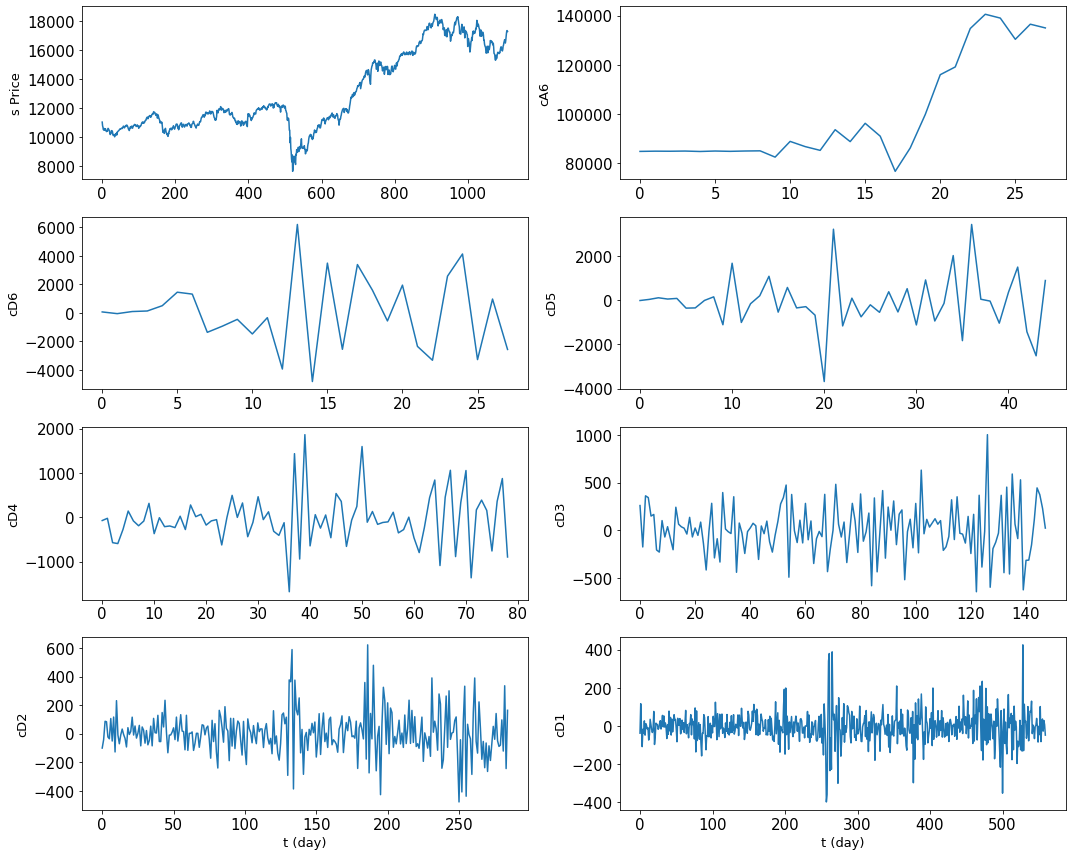

In [90]:
fig,axs = plt.subplots(4,2,figsize=(15,12))
plt.rc('xtick',labelsize=12)
plt.rc('ytick',labelsize=12)
axs[0,0].plot(s)
axs[0,0].set_ylabel('s Price',fontsize=13)
axs[0,1].plot(cA6)
axs[0,1].set_ylabel('cA6',fontsize=13)
axs[1,0].plot(cD6)
axs[1,0].set_ylabel('cD6',fontsize=13)
axs[1,1].plot(cD5)
axs[1,1].set_ylabel('cD5',fontsize=13)
axs[2,0].plot(cD4)
axs[2,0].set_ylabel('cD4',fontsize=13)
axs[2,1].plot(cD3)
axs[2,1].set_ylabel('cD3',fontsize=13)
axs[3,0].plot(cD2)
axs[3,0].set_ylabel('cD2',fontsize=13)
axs[3,0].set_xlabel('t (day)',fontsize=13)
axs[3,1].plot(cD1)
axs[3,1].set_ylabel('cD1',fontsize=13)
axs[3,1].set_xlabel('t (day)',fontsize=13)
plt.tight_layout()
plt.show()

In [91]:
s_r = pywt.waverec(coeffs,'db6','sym')

In [92]:
s_r = s_r[:-1]


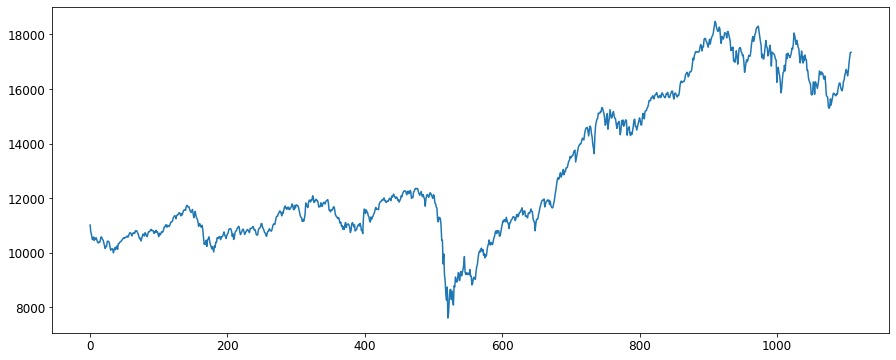

In [93]:
fig,ax = plt.subplots(figsize=(15,6),sharex=False)
#ax.plot(s.values)
ax.plot(s_r)
plt.show()


In [94]:
err = sum(s[1:]-s_r)/len(s)
max_err = max(abs(s[1:]-s_r))
print(err)
print(max_err)


5.646936585025948
1135.2001953124982


In [95]:
cA06 = np.zeros(len(cA6))
cD06 = np.zeros(len(cD6))
cD05 = np.zeros(len(cD5))
cD04 = np.zeros(len(cD4))
cD03 = np.zeros(len(cD3))
cD02 = np.zeros(len(cD2))
cD01 = np.zeros(len(cD1))

In [96]:
A6 = pywt.waverec((cA6,cD06,cD05,cD04,cD03,cD02,cD01),'db6','sym')
D6 = pywt.waverec((cA06,cD6,cD05,cD04,cD03,cD02,cD01),'db6','sym')
D5 = pywt.waverec((cA06,cD06,cD5,cD04,cD03,cD02,cD01),'db6','sym')
D4 = pywt.waverec((cA06,cD06,cD05,cD4,cD03,cD02,cD01),'db6','sym')
D3 = pywt.waverec((cA06,cD06,cD05,cD04,cD3,cD02,cD01),'db6','sym')
D2 = pywt.waverec((cA06,cD06,cD05,cD04,cD03,cD2,cD01),'db6','sym')
D1 = pywt.waverec((cA06,cD06,cD05,cD04,cD03,cD02,cD1),'db6','sym')


In [97]:
A6 = A6[:-1]
D6 = D6[:-1]
D5 = D5[:-1]
D4 = D4[:-1]
D3 = D3[:-1]
D2 = D2[:-1]
D1 = D1[:-1]

In [98]:
A5 = A6 + D6
A4 = A6 + D6 + D5
A3 = A6 + D6 + D5 + D4
A2 = A6 + D6 + D5 + D4 + D3
A1 = A6 + D6 + D5 + D4 + D3 + D2


In [99]:
s_r = A6 + D6 + D5 + D4 + D3 + D2 + D1

In [100]:
t=t[1:]
s=s[1:]

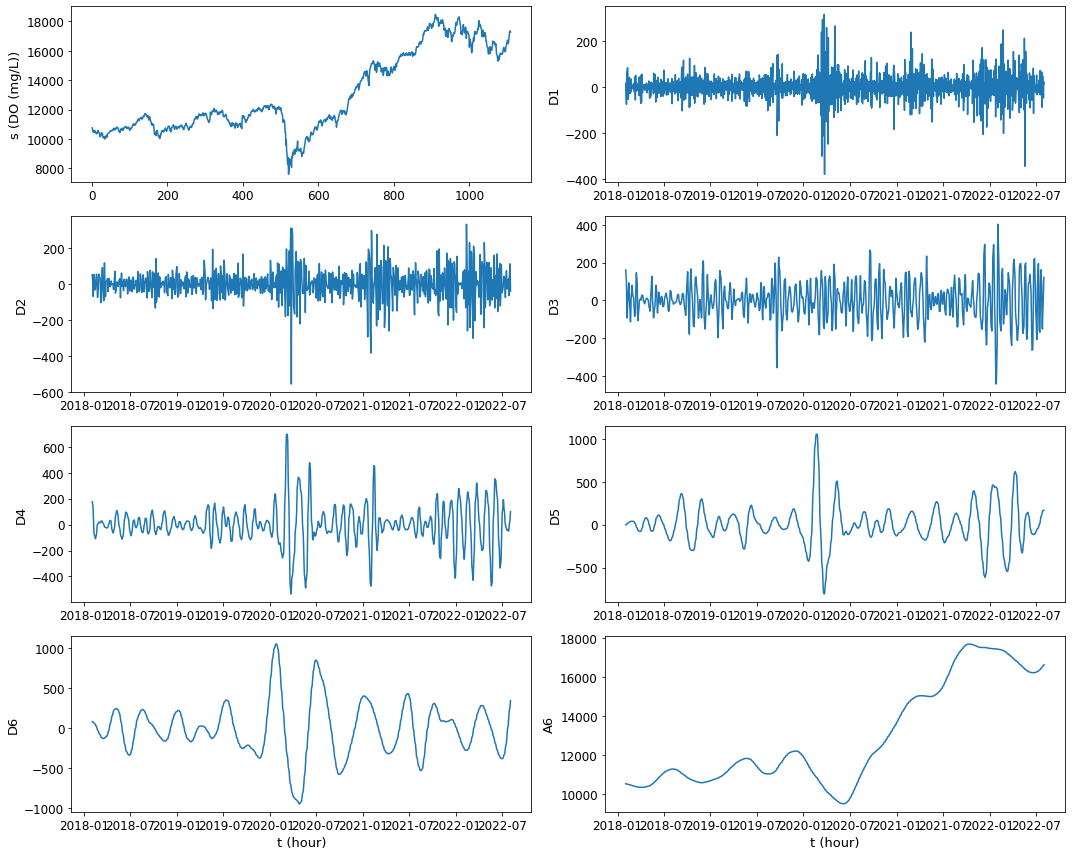

In [101]:
fig,axs = plt.subplots(4,2,figsize=(15,12))
plt.rc('xtick',labelsize=12)
plt.rc('ytick',labelsize=12)
axs[0,0].plot(s)
axs[0,0].set_ylabel('s (DO (mg/L))',fontsize=13)
axs[0,1].plot(t,D1)
axs[0,1].set_ylabel('D1',fontsize=13)
axs[1,0].plot(t,D2)
axs[1,0].set_ylabel('D2',fontsize=13)
axs[1,1].plot(t,D3)
axs[1,1].set_ylabel('D3',fontsize=13)
axs[2,0].plot(t,D4)
axs[2,0].set_ylabel('D4',fontsize=13)
axs[2,1].plot(t,D5)
axs[2,1].set_ylabel('D5',fontsize=13)
axs[3,0].plot(t,D6)
axs[3,0].set_ylabel('D6',fontsize=13)
axs[3,0].set_xlabel('t (hour)',fontsize=13)
axs[3,1].plot(t,A6)
axs[3,1].set_ylabel('A6',fontsize=13)
axs[3,1].set_xlabel('t (hour)',fontsize=13)
plt.tight_layout()

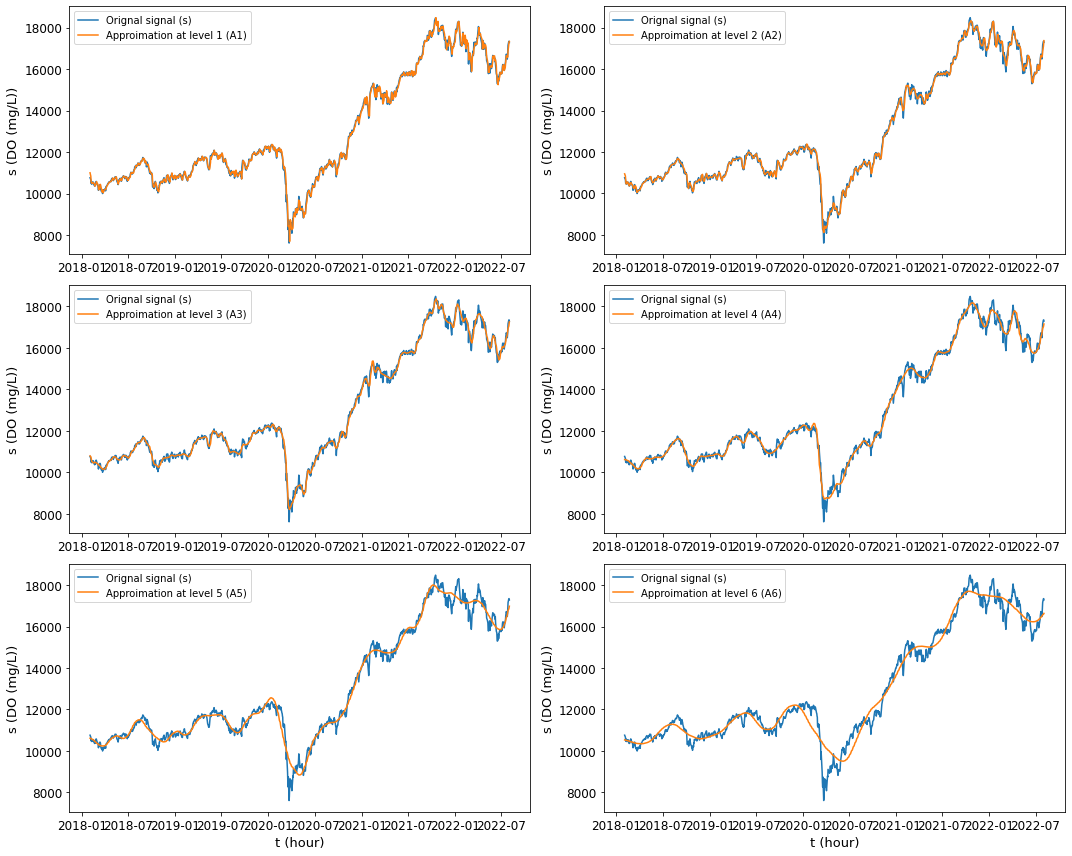

In [102]:
fig,axs = plt.subplots(3,2,figsize=(15,12))
plt.rc('xtick',labelsize=12)
plt.rc('ytick',labelsize=12)
axs[0,0].plot(t,s)
axs[0,0].plot(t,A1)
axs[0,0].set_ylabel('s (DO (mg/L))',fontsize=13)
axs[0,0].legend(('Orignal signal (s)','Approimation at level 1 (A1)'),loc='best')
axs[0,1].plot(t,s)
axs[0,1].plot(t,A2)
axs[0,1].set_ylabel('s (DO (mg/L))',fontsize=13)
axs[0,1].legend(('Orignal signal (s)','Approimation at level 2 (A2)'),loc='best')
axs[1,0].plot(t,s)
axs[1,0].plot(t,A3)
axs[1,0].set_ylabel('s (DO (mg/L))',fontsize=13)
axs[1,0].legend(('Orignal signal (s)','Approimation at level 3 (A3)'),loc='best')
axs[1,1].plot(t,s)
axs[1,1].plot(t,A4)
axs[1,1].set_ylabel('s (DO (mg/L))',fontsize=13)
axs[1,1].legend(('Orignal signal (s)','Approimation at level 4 (A4)'),loc='best')
axs[2,0].plot(t,s)
axs[2,0].plot(t,A5)
axs[2,0].set_ylabel('s (DO (mg/L))',fontsize=13)
axs[2,0].legend(('Orignal signal (s)','Approimation at level 5 (A5)'),loc='best')
axs[2,0].set_xlabel('t (hour)',fontsize=13)
axs[2,1].plot(t,s)
axs[2,1].plot(t,A6)
axs[2,1].set_ylabel('s (DO (mg/L))',fontsize=13)
axs[2,1].legend(('Orignal signal (s)','Approimation at level 6 (A6)'),loc='best')
axs[2,1].set_xlabel('t (hour)',fontsize=13)
plt.tight_layout()

plt.show()

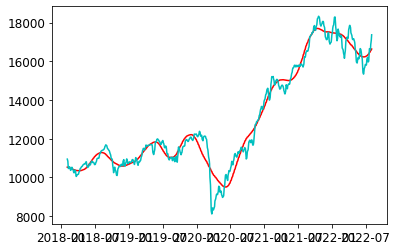

In [106]:
plt.plot(t,A6,color='r')
plt.plot(t,A2,color='c');

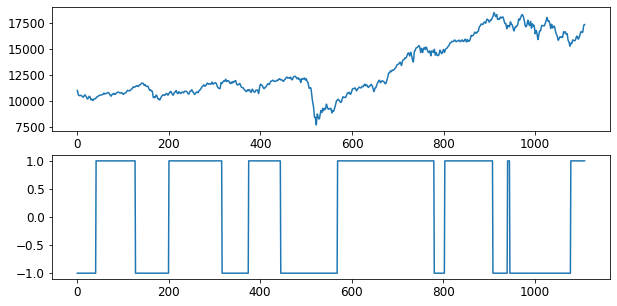

In [115]:
fig,axs = plt.subplots(2,1,figsize=(10,5))
plt.rc('xtick',labelsize=12)
plt.rc('ytick',labelsize=12)
axs[1].plot(np.sign(pd.Series(A6).diff()))
axs[0].plot(A1)